In [1]:
library(rstan)

Loading required package: Rcpp
Loading required package: inline

Attaching package: ‘inline’

The following object is masked from ‘package:Rcpp’:

    registerPlugin

rstan (Version 2.6.0, packaged: 2015-02-06 21:02:34 UTC, GitRev: 198082f07a60)


In [3]:
schools_code <- "
data {
  int<lower=0> J; // number of schools 
  real y[J]; // estimated treatment effects
  real<lower=0> sigma[J]; // s.e. of effect estimates 
}
parameters {
  real mu; 
  real<lower=0> tau;
  real eta[J];
}
transformed parameters {
  real theta[J];
  for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
  eta ~ normal(0, 1);
  y ~ normal(theta, sigma);
}
"
schools_dat <- list(J = 8, 
                    y = c(28,  8, -3,  7, -1,  1, 18, 12),
                    sigma = c(15, 10, 16, 11,  9, 11, 10, 18))

fit <- stan(model_code=schools_code, data = schools_dat, 
            iter = 1000, chains = 4)


TRANSLATING MODEL 'schools_code' FROM Stan CODE TO C++ CODE NOW.
COMPILING THE C++ CODE FOR MODEL 'schools_code' NOW.

SAMPLING FOR MODEL 'schools_code' NOW (CHAIN 1).

Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)
#  Elapsed Time: 0.016339 seconds (Warm-up)
#                0.017577 seconds (Sampling)
#                0.033916 seconds (Total)


SAMPLING FOR MODEL 'schools_code' NOW (CHAIN 2).

Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration:

In [6]:
print(fit)

Inference for Stan model: schools_code.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean   sd   2.5%   25%   50%   75% 97.5% n_eff Rhat
mu        7.90    0.19 5.11  -2.76  4.77  7.76 11.24 17.33   720 1.00
tau       6.58    0.24 5.38   0.21  2.56  5.26  9.25 20.91   506 1.00
eta[1]    0.38    0.02 0.91  -1.51 -0.21  0.42  1.02  2.06  1325 1.00
eta[2]   -0.01    0.02 0.90  -1.83 -0.59 -0.01  0.58  1.70  1606 1.00
eta[3]   -0.16    0.02 0.93  -1.93 -0.81 -0.15  0.48  1.69  1700 1.00
eta[4]   -0.02    0.02 0.92  -1.78 -0.60 -0.04  0.59  1.77  1498 1.00
eta[5]   -0.37    0.02 0.85  -2.08 -0.94 -0.39  0.19  1.37  1423 1.00
eta[6]   -0.17    0.02 0.86  -1.89 -0.72 -0.17  0.39  1.48  1465 1.00
eta[7]    0.32    0.02 0.87  -1.45 -0.26  0.32  0.87  2.01  1594 1.00
eta[8]    0.07    0.02 0.93  -1.76 -0.54  0.06  0.74  1.86  1393 1.00
theta[1] 11.47    0.30 8.45  -1.84  5.87 10.34 15.84 32.15   804 1.00
thet

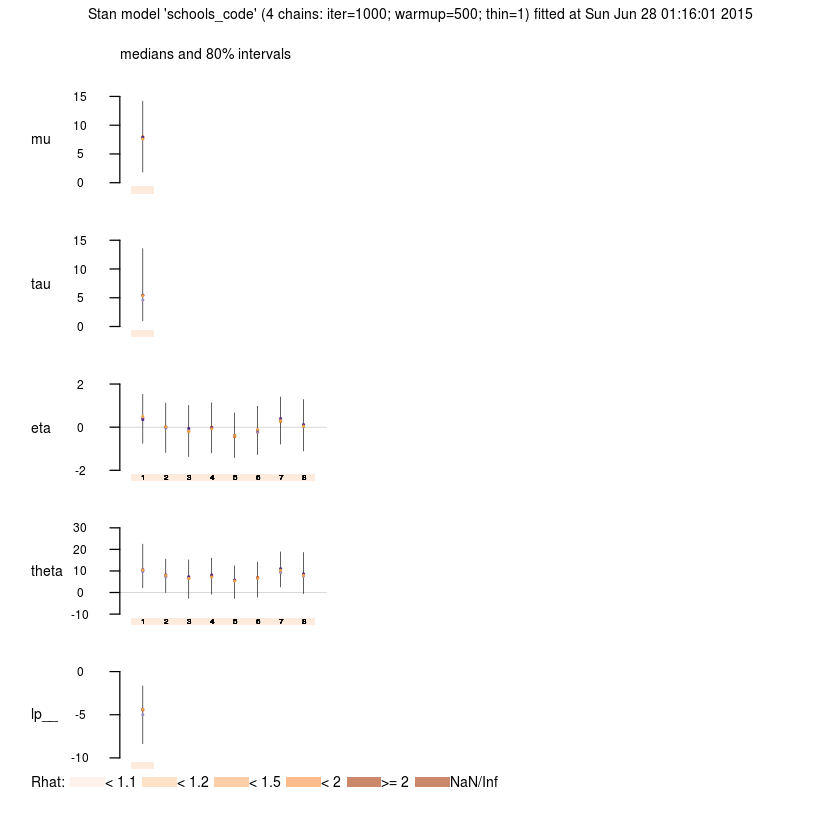

In [7]:
plot(fit)